# Activity 7 - Violin Plots and Parallel Coordinates

This notebook will demonstrate the use of Violin Plots and Parallel Coordinates. This visualisation technique, similar to a box plot, is well suited for comparing multiple distributions, and show a curved distribution plot for each feature under consideration. Below shows a simple violin plot example using Seaborn.

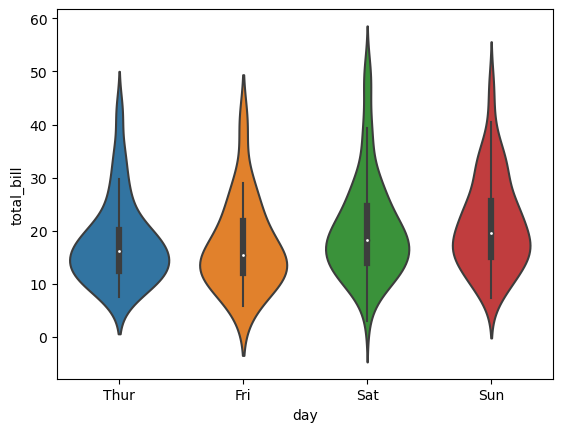

In [1]:
#!pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
ax = sns.violinplot(x="day", y="total_bill", data=tips)

## Case Study: Comparing Benign and DDoS behaviours in network traffic analysis using CICIDS2017

Let's consider an example where we want to look at benign and malicious network traffic. We will use to CICIDS2017 dataset for this. This dataset captures in the region of 80 numerical features that characterise network activity. Each data instance has been labelled as either benign or as an attack type (we focus on DDoS here, however other attacks are present in the full dataset). What data attributes set these two classes apart? We can use violin plots to judge this visually over the entire dataset.

### Load in dataset and clean it up

First we will load in the data set, and we will remove all Not-a-Number and Infinity values that may be present. We will also remove columns that contain only zeros (i.e., no separating features).

In [2]:
# Load in the dataset
df = pd.read_csv('./data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
# Remove NaN and Inf
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
# Remove columns with all zero values
df = df.loc[:, (df != 0).any(axis=0)]
# Output table
df

C:\Users\pa-legg\AppData\Local\Temp\ipykernel_24464\2483369290.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,192.168.10.15-72.21.91.29-61374-80-6,72.21.91.29,80,192.168.10.15,61374,6,7/7/2017 5:02,61,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,192.168.10.15-72.21.91.29-61378-80-6,72.21.91.29,80,192.168.10.15,61378,6,7/7/2017 5:02,72,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,192.168.10.15-72.21.91.29-61375-80-6,72.21.91.29,80,192.168.10.15,61375,6,7/7/2017 5:02,75,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,192.168.10.15-8.41.222.187-61323-80-6,8.41.222.187,80,192.168.10.15,61323,6,7/7/2017 5:02,48,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
# What columns are left?
print (df.columns)
# How many columns?
print ("Length: ", len(df.columns))

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length S

### Normalise each column

Each column has its own range of values - some are quite narrow, some are quite large. We often normalise data to make it easier to work with and draw comparisons - this essentially means scaling it to be within a fixed range. Here, we want to normalise each feature indepedently - essentially meaning that each column will have a minimum value of zero and a maximum value of one, and all values for that particular feature will be scaled within this range.

We will use the sci-kit learn library to achieve this.

In [4]:
# Import scikit learn
from sklearn import preprocessing
# Extract only the numerical feature columns
subset = df.iloc[:,7:74].astype(float)
# Define the scaler
min_max_scaler = preprocessing.MinMaxScaler()
# Apply the scaler to each column of our dataframe
df2 = pd.DataFrame(min_max_scaler.fit_transform(subset), columns=subset.columns, index=subset.index)
df2

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,3.333335e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,0.000000,...,0.000518,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.166671e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,0.000514,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.416669e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,0.000514,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.916668e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,0.000514,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.333335e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,0.000000,...,0.000518,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,5.166669e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,0.000514,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225741,6.083336e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,0.000514,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225742,6.333337e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,0.000514,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225743,4.083335e-07,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,0.000000,...,0.000518,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Separate data based on class

We have scaled the entire dataset so that all data for each feature is scaled in a consistent manner. We now want to split our dataset based on the classes of data that exist. Here, we know we have benign and DDoS classes.

In [5]:
# Output the classes
outcome = df[' Label'].unique()
print(outcome)

['BENIGN' 'DDoS']


In [6]:
# Split data based on identified classes
df2[' Label'] = df[' Label']
benign = df2[df2[' Label'] == outcome[0]]
ddos = df2[df2[' Label'] == outcome[1]]

In [7]:
benign

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3.333335e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,0.000000,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,9.166671e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,0.000514,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,4.416669e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,0.000514,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,2.916668e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,0.000514,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,3.333335e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,0.000000,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,5.166669e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,0.000514,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
225741,6.083336e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,0.000514,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
225742,6.333337e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,0.000514,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
225743,4.083335e-07,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,0.000000,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


### Visualise the output

We now have our data split into the classes, so we can use the violin plot for each of our classes independently, and compare the two figures.

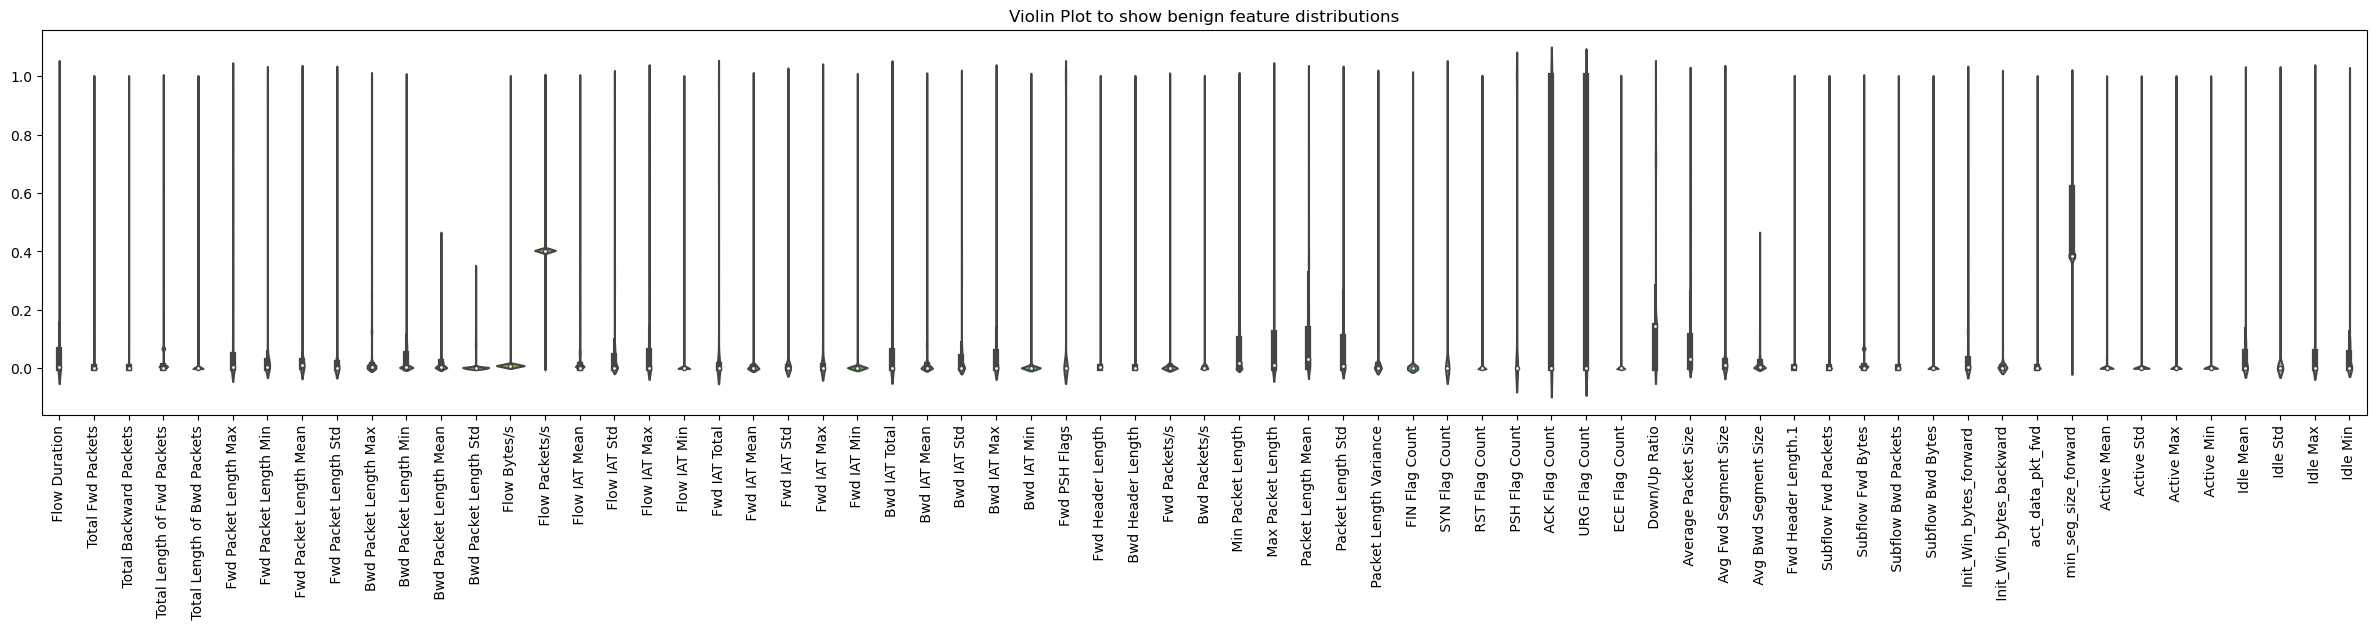

In [8]:
plt.figure(figsize=(30,5))
ax = sns.violinplot(data=benign)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title("Violin Plot to show benign feature distributions");

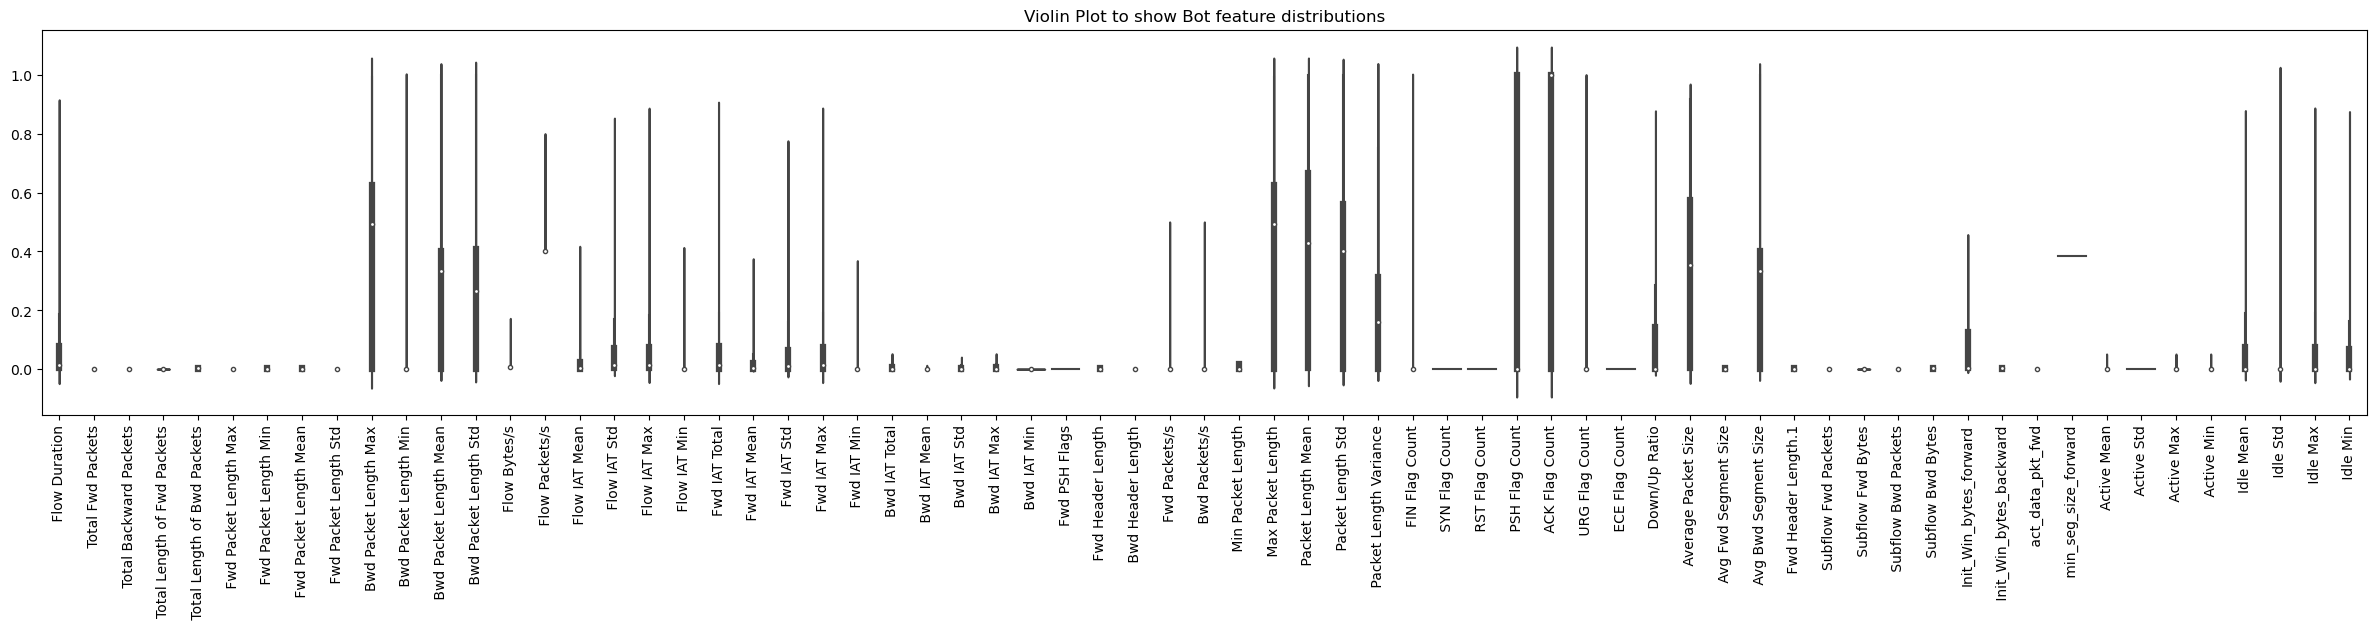

In [9]:
plt.figure(figsize=(30,5))
ax = sns.violinplot(data=ddos)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title("Violin Plot to show Bot feature distributions");

### Findings

Comparing the two charts, we can see that the following features are different across the two classes.

* Flow Duration
* Flow IAT (Mean, Std, Max, Min)
* Fwd IAT (Total, Mean, Std, Max, Min)
* Packet Length Variance
* Idle (Mean, Std, Max, Min)

We now have a clearer view (as far as this dataset is concerned) with what makes for a benign packet, and what makes for a malicious DDoS packet.

### Extra: PCA decomposition to separate classes

Given the high dimensionality of the data, what does the data look like if we perform dimensionality reduction? Can we better separate between the two classes? 

In [10]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X = pd.DataFrame(pca.fit_transform(df2.values), columns=['x', 'y'])
X['Label'] = df[' Label']

benignX = X[X['Label'] == outcome[0]]
ddosX = X[X['Label'] == outcome[1]]

plt.scatter(benignX['x'], benignX['y'])
plt.scatter(ddosX['x'], ddosX['y'])

ValueError: could not convert string to float: 'BENIGN'

***Unfortunately not*** - this is not a great surprise, our violin plot shows overlap between the features of the two classes and there is no clear decision boundary that separates the two. PCA is quite poor when there is little variance in many features (as we have here) hence why the plot has artefacts where straight lines appear. Other methods like t-SNE and UMAP may perform better but at greater computational cost.

/Users/pa-legg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


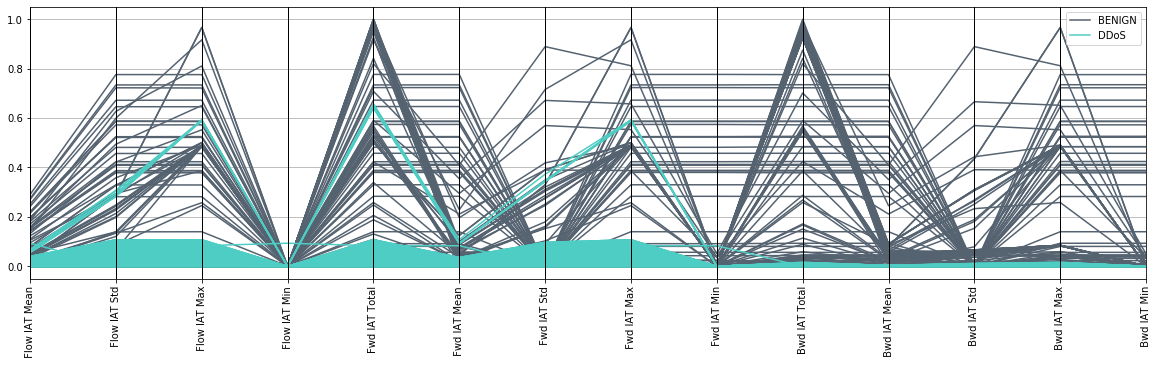

In [47]:
# Here's an example of selecting all columns that contain the.phrase 'IAT'

cols = 5

df3 = df2[ df2.columns[ df2.columns.str.contains("IAT") ] ]
#df3 = df3.iloc[:,0:cols]

df3[' Label'] = df2[' Label']


samples = 1000
benign3 = df3[df3[' Label'] == outcome[0]].iloc[0:samples,:]
ddos3 = df3[df3[' Label'] == outcome[1]].iloc[0:samples,:]


df3 = pd.concat([benign3, ddos3])
df3

plt.figure(figsize=(20,5))
ax = pd.plotting.parallel_coordinates(df3, ' Label', color=('#556270', '#4ECDC4'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);